#SEM

# See some of these (Statistics of DOOM)
http://sachaepskamp.com/semPlot

# Use Lavaan
https://www.lavaan.ugent.be/

# And Semplot
http://sachaepskamp.com/semPlot

# Another tutorial
https://stats.idre.ucla.edu/r/seminars/rsem/

In [2]:
library(tidyverse)
library(lavaan)
library(lubridate)
library(semPlot)

iopath <- '/Users/gmaurer/GD_gmaurer@nmsu/_current/gc_ltreb_io'

In [3]:
df <- read_csv(paste0(iopath, '/data/reduced_plotlevel_update.csv'))

Rows: 827 Columns: 20
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): PPT treatment
dbl (19): year, plotid, ppt_trt, n_trt, biomass.grass, biomass.rare, biomass...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
head(df)

year,plotid,ppt_trt,n_trt,biomass.grass,biomass.rare,biomass.shrub,cover.grass,cover.rare,cover.shrub,biomass.total,cover.total,PPT treatment,ann_PPT_mm,gs_PPT_mm,shrubratio,RUEann_tot,RUEgs_tot,RUEgs_shrub,RUEgs_grass
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2006,104,1,1,126.83714,3.382477,19.691052,0.4794267,0.01832229,0.10666298,149.9107,0.6044120,-80%,NA,NA,0.13135191,NA,NA,NA,NA
2006,108,1,0,104.61701,21.647286,23.448126,0.3954378,0.11725955,0.12701439,149.7124,0.6397117,-80%,NA,NA,0.15662111,NA,NA,NA,NA
2006,114,1,1,87.40713,24.078834,17.116412,0.3303868,0.13043082,0.09271660,128.6024,0.5535342,-80%,NA,NA,0.13309561,NA,NA,NA,NA
2006,126,1,0,122.05797,36.484190,51.738546,0.4613621,0.19762846,0.28025863,210.2807,0.9392492,-80%,NA,NA,0.24604514,NA,NA,NA,NA
2006,134,1,0,121.31113,18.787405,6.804681,0.4585392,0.10176808,0.03685977,146.9032,0.5971670,-80%,NA,NA,0.04632085,NA,NA,NA,NA
2006,136,1,1,140.67847,21.607569,13.863992,0.5317451,0.11704441,0.07509881,176.1500,0.7238883,-80%,NA,NA,0.07870559,NA,NA,NA,NA


In [5]:
sm <-  read_csv(paste0(iopath, '/data/sm_long_new.csv'))

Rows: 1967760 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): variable, depth, Treatment
dbl  (6): value, plotid, n_trt, ppt_trt, month, year
dttm (1): datetime

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [6]:
tail(sm)

datetime,variable,value,depth,plotid,n_trt,ppt_trt,month,year,Treatment
<dttm>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
2024-09-29 19:00:00,surfVWC_341_Avg,0.023,surf,341,0,5,9,2024,+80%
2024-09-29 20:00:00,surfVWC_341_Avg,0.023,surf,341,0,5,9,2024,+80%
2024-09-29 21:00:00,surfVWC_341_Avg,0.022,surf,341,0,5,9,2024,+80%
2024-09-29 22:00:00,surfVWC_341_Avg,0.022,surf,341,0,5,9,2024,+80%
2024-09-29 23:00:00,surfVWC_341_Avg,0.021,surf,341,0,5,9,2024,+80%
2024-09-30 00:00:00,surfVWC_341_Avg,0.021,surf,341,0,5,9,2024,+80%


In [7]:
unique(year(sm$datetime))

[1] 2018 2019 2020 2021 2022 2023 2024

In [8]:
sm_ann <- sm %>% 
  mutate(mon = month(datetime),
         year = year(datetime)) %>%
  filter(mon > 6 & mon < 10) %>%
  group_by(year, plotid, depth) %>% 
  summarise(meansm = mean(value, na.rm = T)) %>%
  pivot_wider(names_from = depth, values_from = meansm)


`summarise()` has grouped output by 'year', 'plotid'. You can override using
the `.groups` argument.


In [9]:
head(sm_ann)


year,plotid,deep,surf
<dbl>,<dbl>,<dbl>,<dbl>
2018,101,0.05591756,0.10526317
2018,108,0.06647203,0.10867137
2018,124,0.06570772,0.12468706
2018,126,0.05658909,0.09350429
2018,131,0.07900632,0.13509695
2018,139,0.06518514,0.14232011


In [10]:
# Join soil mosture and other data
df <- df %>% left_join(sm_ann, by=c('year','plotid'))
# get a dataset with 2016 + data
df2 <- df %>% filter(year > 2015)
df3 <- df %>% filter(year > 2005 & year < 2025)

In [11]:
unique(df3$year)

[1] 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020
[16] 2021 2022 2023 2024

In [12]:
length(unique(df$plotid))

[1] 85

## Mediation 1 growing season ppt

In [13]:
med.model.1gs <- "
  biomass.shrub ~ gs_PPT_mm + n_trt + biomass.grass  
  biomass.grass ~ gs_PPT_mm + n_trt
"
med.1gs.fit <- sem(med.model.1gs, data=df)

In [14]:
summary(med.1gs.fit, rsq=TRUE, standardized=F, fit.measures=F)

lhs,op,rhs,exo,est,se,z,pvalue
<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
biomass.shrub,~,gs_PPT_mm,0,1.133690e-05,0.01166344,9.720037e-04,9.992245e-01
biomass.shrub,~,n_trt,0,-1.272297e+01,2.49888970,-5.091448e+00,3.553386e-07
biomass.shrub,~,biomass.grass,0,-4.515950e-01,0.02601158,-1.736131e+01,0.000000e+00
biomass.grass,~,gs_PPT_mm,0,2.351036e-01,0.01433940,1.639563e+01,0.000000e+00
biomass.grass,~,n_trt,0,-4.363473e+00,3.60419984,-1.210663e+00,2.260244e-01
biomass.shrub,~~,biomass.shrub,0,1.104541e+03,58.66425181,1.882817e+01,0.000000e+00
biomass.grass,~~,biomass.grass,0,2.302513e+03,122.29085257,1.882817e+01,0.000000e+00
gs_PPT_mm,~~,gs_PPT_mm,1,1.579409e+04,0.00000000,NA,NA
gs_PPT_mm,~~,n_trt,1,-9.599903e-02,0.00000000,NA,NA


In [15]:
AIC(med.1gs.fit)

[1] 14495.11

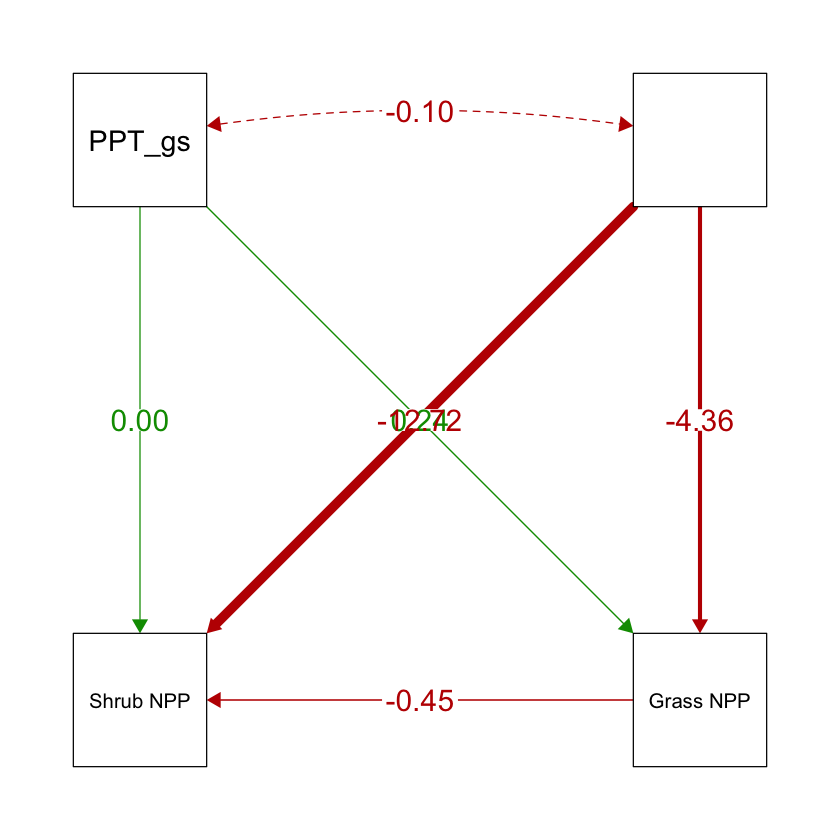

In [16]:
#png('../figs/sem_med1_allgs.png')
med1gs_plot <- semPlot::semPaths(med.1gs.fit, "par",
             sizeMan = 15, sizeInt = 15, sizeLat = 15,
             edge.label.cex=1.5,
             fade=FALSE, residuals=FALSE,
             nodeLabels=c('Shrub NPP', 'Grass NPP','PPT_gs'))
#dev.off()

## Mediation 2, growing season ppt

In [22]:
med.model.2gs <- "
  biomass.grass ~ gs_PPT_mm  
  biomass.shrub ~ gs_PPT_mm + biomass.grass
"
med.2gs.fit <- sem(med.model.2gs, data=df3)

In [23]:
summary(med.2gs.fit, rsq=TRUE, standardized=F, fit.measures=F)

lhs,op,rhs,exo,est,se,z,pvalue
<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
biomass.grass,~,gs_PPT_mm,0,2.351301e-01,0.01435420,16.3805759,0.000000
biomass.shrub,~,gs_PPT_mm,0,-1.325717e-03,0.01187173,-0.1116701,0.911085
biomass.shrub,~,biomass.grass,0,-4.455797e-01,0.02645550,-16.8426100,0.000000
biomass.grass,~~,biomass.grass,0,2.307273e+03,122.54366277,18.8281704,0.000000
biomass.shrub,~~,biomass.shrub,0,1.144925e+03,60.80916634,18.8281704,0.000000
gs_PPT_mm,~~,gs_PPT_mm,1,1.579409e+04,0.00000000,NA,NA
biomass.grass,r2,biomass.grass,0,2.745491e-01,NA,NA,NA
biomass.shrub,r2,biomass.shrub,0,3.570705e-01,NA,NA,NA


In [30]:
png(paste0(iopath, '/figs/fig2sem_med2_gs_2006-2024.png'), width=6, height=6, units='in', res=400)
med2gs_plot <- semPlot::semPaths(med.2gs.fit, "par",
             sizeMan = 15, sizeInt = 15, sizeLat = 15,
             edge.label.cex=1.5,
             fade=FALSE, residuals=FALSE,
             nodeLabels=c('Grass NPP', 'Shrub NPP','PPT_gs'))
dev.off()

pdf 
  2

## Mediation 1, growing season ppt, 2016 +

In [39]:
med.model.1gs <- "
  biomass.shrub ~ gs_PPT_mm + biomass.grass  
  biomass.grass ~ gs_PPT_mm"
med.1gs.fit <- sem(med.model.1gs, data=df2)

In [40]:
summary(med.1gs.fit, rsq=TRUE, standardized=F, fit.measures=F)

lhs,op,rhs,exo,est,se,z,pvalue
<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
biomass.shrub,~,gs_PPT_mm,0,-1.472938e-01,0.02409223,-6.1137468,9.731866e-10
biomass.shrub,~,biomass.grass,0,1.154971e-02,0.06707642,0.1721873,8.632903e-01
biomass.grass,~,gs_PPT_mm,0,2.494941e-01,0.01522516,16.3869642,0.000000e+00
biomass.shrub,~~,biomass.shrub,0,9.556546e+02,79.63788376,12.0000000,0.000000e+00
biomass.grass,~~,biomass.grass,0,7.375113e+02,61.45927574,12.0000000,0.000000e+00
gs_PPT_mm,~~,gs_PPT_mm,1,1.104721e+04,0.00000000,NA,NA
biomass.shrub,r2,biomass.shrub,0,1.943164e-01,NA,NA,NA
biomass.grass,r2,biomass.grass,0,4.825101e-01,NA,NA,NA


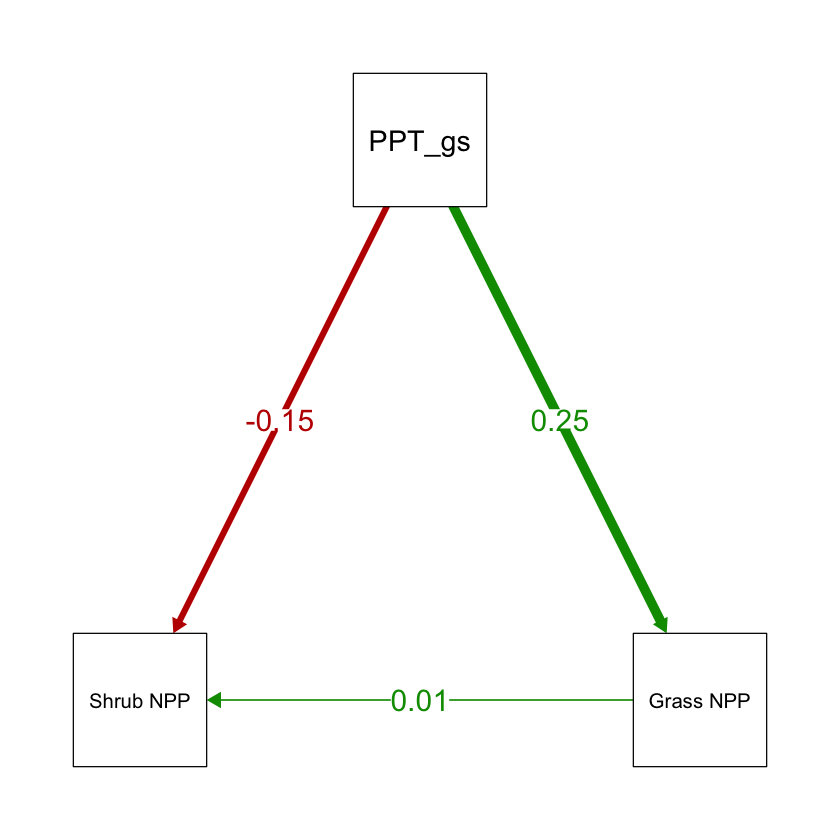

In [41]:
#png(paste0(iopath, '/figs/sem_med1_2016gs.png'))
med1gs_plot <- semPlot::semPaths(med.1gs.fit, "par",
             sizeMan = 15, sizeInt = 15, sizeLat = 15,
             edge.label.cex=1.5,
             fade=FALSE, residuals=FALSE,
             nodeLabels=c('Shrub NPP', 'Grass NPP','PPT_gs'))
#dev.off()

## Mediation 2 growing season ppt, 2016+

In [42]:
med.model.2gs <- "
  biomass.grass ~ gs_PPT_mm + biomass.shrub  
  biomass.shrub ~ gs_PPT_mm
"
med.2gs.fit <- sem(med.model.2gs, data=df2)

In [43]:
summary(med.2gs.fit, , rsq=TRUE, standardized=F, fit.measures=F)

lhs,op,rhs,exo,est,se,z,pvalue
<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
biomass.grass,~,gs_PPT_mm,0,2.507812e-01,0.01696035,14.7863200,0.0000000
biomass.grass,~,biomass.shrub,0,8.912385e-03,0.05175984,0.1721873,0.8632903
biomass.shrub,~,gs_PPT_mm,0,-1.444122e-01,0.01733206,-8.3320836,0.0000000
biomass.grass,~~,biomass.grass,0,7.374354e+02,61.45294940,12.0000000,0.0000000
biomass.shrub,~~,biomass.shrub,0,9.557530e+02,79.64608216,12.0000000,0.0000000
gs_PPT_mm,~~,gs_PPT_mm,1,1.104721e+04,0.00000000,NA,NA
biomass.grass,r2,biomass.grass,0,4.825634e-01,NA,NA,NA
biomass.shrub,r2,biomass.shrub,0,1.942334e-01,NA,NA,NA


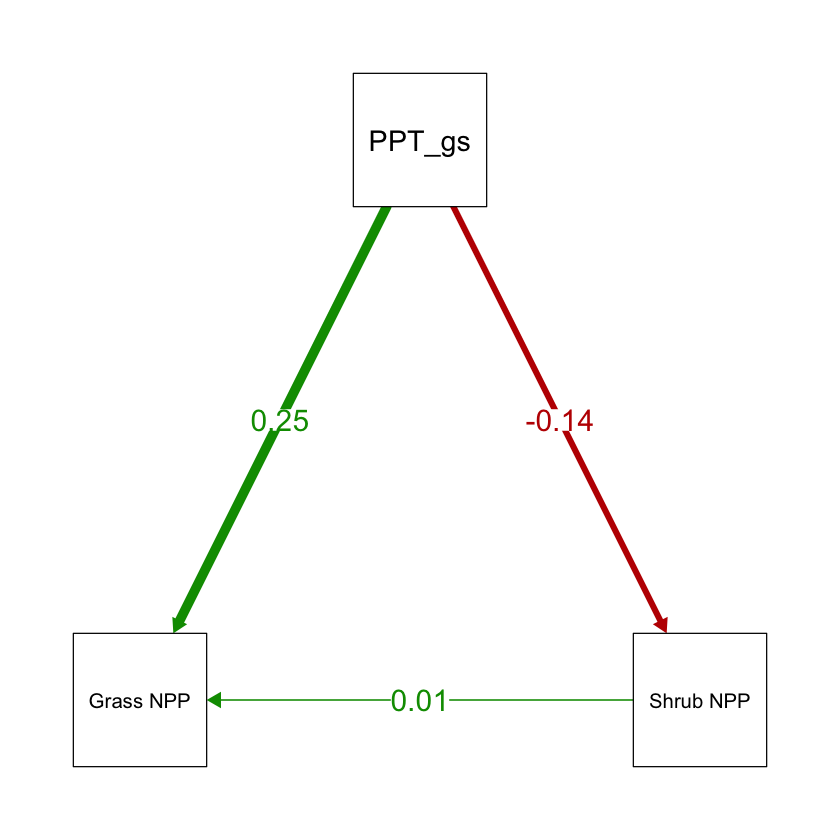

In [45]:
#png(paste0(iopath, '/figs/sem_med2_2016gs.png'))
med2gs_plot <- semPlot::semPaths(med.2gs.fit, "par",
             sizeMan = 15, sizeInt = 15, sizeLat = 15,
             edge.label.cex=1.5,
             fade=FALSE, residuals=FALSE,
             nodeLabels=c('Grass NPP', 'Shrub NPP','PPT_gs'))
#dev.off()

## Mediation 1, annual ppt

In [46]:
med.model.1ann <- "
  biomass.shrub ~ ann_PPT_mm + biomass.grass  
  biomass.grass ~ ann_PPT_mm
"
med.1ann.fit <- sem(med.model.1ann, data=df)

In [47]:
summary(med.1ann.fit, rsq=TRUE, standardized=F, fit.measures=F)

lhs,op,rhs,exo,est,se,z,pvalue
<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
biomass.shrub,~,ann_PPT_mm,0,2.977996e-02,8.485102e-03,3.509676,0.0004486537
biomass.shrub,~,biomass.grass,0,-4.914003e-01,2.565543e-02,-19.153851,0.0000000000
biomass.grass,~,ann_PPT_mm,0,1.626174e-01,1.081581e-02,15.035164,0.0000000000
biomass.shrub,~~,biomass.shrub,0,1.125393e+03,5.977179e+01,18.828170,0.0000000000
biomass.grass,~~,biomass.grass,0,2.411568e+03,1.280830e+02,18.828170,0.0000000000
ann_PPT_mm,~~,ann_PPT_mm,1,2.907605e+04,0.000000e+00,NA,NA
biomass.shrub,r2,biomass.shrub,0,3.680386e-01,NA,NA,NA
biomass.grass,r2,biomass.grass,0,2.417568e-01,NA,NA,NA


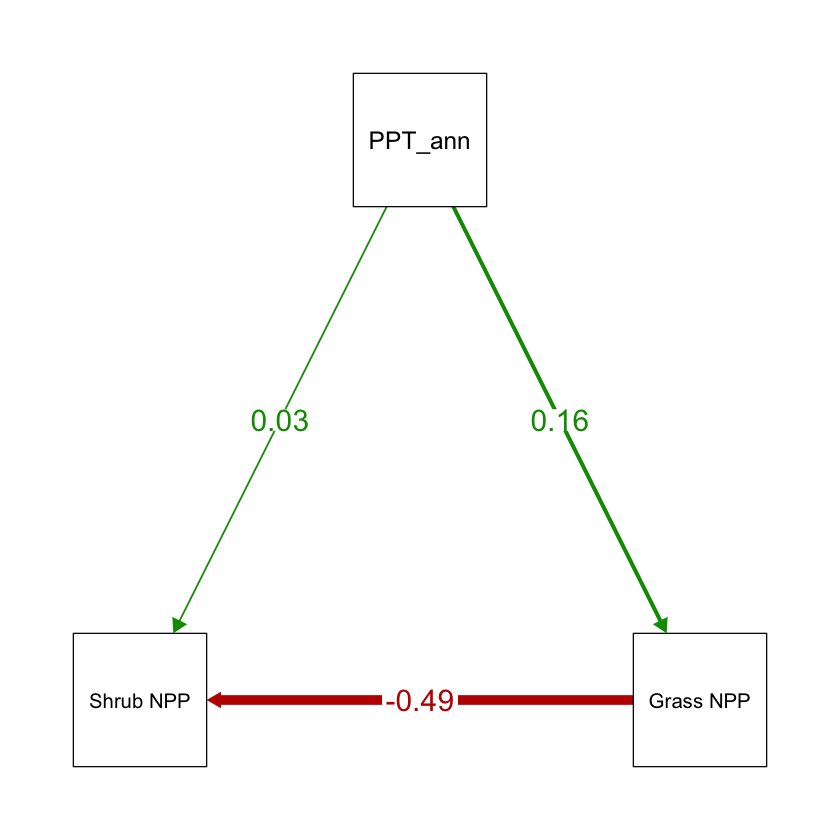

In [48]:
#png(paste0(iopath, '/figs/sem_med1_allann.png'))
med1ann_plot <- semPlot::semPaths(med.1ann.fit, "par",
             sizeMan = 15, sizeInt = 15, sizeLat = 15,
             edge.label.cex=1.5,
             fade=FALSE, residuals=FALSE,
             nodeLabels=c('Shrub NPP', 'Grass NPP','PPT_ann'))
#dev.off()

## Mediation 2, annual ppt

In [49]:
med.model.2ann <- "
  biomass.grass ~ ann_PPT_mm + biomass.shrub  
  biomass.shrub ~ ann_PPT_mm
"
med.2ann.fit <- sem(med.model.2ann, data=df)

In [50]:
summary(med.2ann.fit, rsq=TRUE, standardized=F, fit.measures=F)

lhs,op,rhs,exo,est,se,z,pvalue
<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
biomass.grass,~,ann_PPT_mm,0,1.278304e-01,0.008966027,14.257195,0.000000e+00
biomass.grass,~,biomass.shrub,0,-6.939321e-01,0.036229379,-19.153851,0.000000e+00
biomass.shrub,~,ann_PPT_mm,0,-5.013030e-02,0.009101608,-5.507851,3.632414e-08
biomass.grass,~~,biomass.grass,0,1.589227e+03,84.406877002,18.828170,0.000000e+00
biomass.shrub,~~,biomass.shrub,0,1.707725e+03,90.700530657,18.828170,0.000000e+00
ann_PPT_mm,~~,ann_PPT_mm,1,2.907605e+04,0.000000000,NA,NA
biomass.grass,r2,biomass.grass,0,5.003165e-01,NA,NA,NA
biomass.shrub,r2,biomass.shrub,0,4.103196e-02,NA,NA,NA


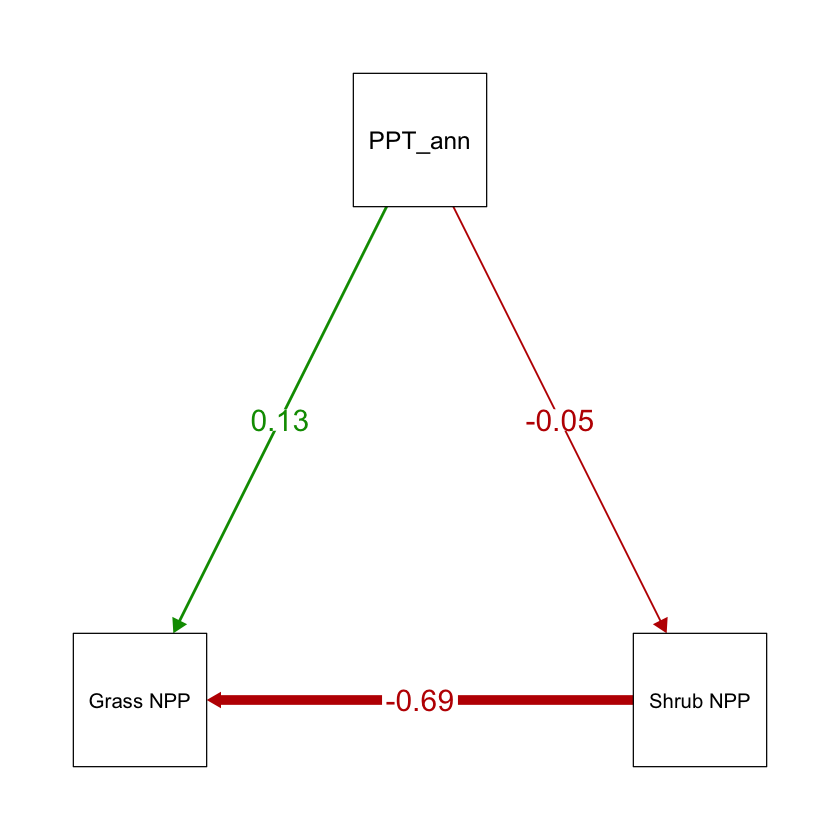

In [51]:
#png(paste0(iopath, '/figs/sem_med2_allann.png'))
med2ann_plot <- semPlot::semPaths(med.2ann.fit, "par",
             sizeMan = 15, sizeInt = 15, sizeLat = 15,
             edge.label.cex=1.5,
             fade=FALSE, residuals=FALSE,
             nodeLabels=c('Grass NPP', 'Shrub NPP','PPT_ann'))
#dev.off()

## Mediation 1, annual ppt, 2016 +

In [53]:
med.model.1gs <- "
  biomass.shrub ~ ann_PPT_mm + biomass.grass  
  biomass.grass ~ ann_PPT_mm
"
med.1ann.fit <- sem(med.model.1ann, data=df2)

In [30]:
summary(med.1ann.fit, rsq=TRUE, standardized=F, fit.measures=F)

lavaan 0.6-9 ended normally after 16 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                         5
                                                      
                                                  Used       Total
  Number of observations                           144         180
                                                                  
Model Test User Model:
                                                      
  Test statistic                                 0.000
  Degrees of freedom                                 0

Parameter Estimates:

  Standard errors                             Standard
  Information                                 Expected
  Information saturated (h1) model          Structured

Regressions:
                   Estimate   Std.Err  z-value  P(>|z|)
  biomass.shrub ~                                      
    ann_PPT_mm        -0.123

In [31]:
png(paste0(iopath, '/figs/sem_med1_2016ann.png'))
med1ann_plot <- semPlot::semPaths(med.1ann.fit, "par",
             sizeMan = 15, sizeInt = 15, sizeLat = 15,
             edge.label.cex=1.5,
             fade=FALSE, residuals=FALSE,
             nodeLabels=c('Shrub NPP', 'Grass NPP','PPT_ann'))
dev.off()

png 
  2

## Mediation 2, annual ppt, 2016+

In [32]:
med.model.2ann <- "
  biomass.grass ~ ann_PPT_mm + biomass.shrub  
  biomass.shrub ~ ann_PPT_mm
"
med.2ann.fit <- sem(med.model.2ann, data=df2)

In [33]:
summary(med.2ann.fit, rsq=TRUE, standardized=F, fit.measures=F)

lavaan 0.6-9 ended normally after 16 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                         5
                                                      
                                                  Used       Total
  Number of observations                           144         180
                                                                  
Model Test User Model:
                                                      
  Test statistic                                 0.000
  Degrees of freedom                                 0

Parameter Estimates:

  Standard errors                             Standard
  Information                                 Expected
  Information saturated (h1) model          Structured

Regressions:
                   Estimate   Std.Err  z-value  P(>|z|)
  biomass.grass ~                                      
    ann_PPT_mm         0.195

In [34]:
png(paste0(iopath, '/figs/sem_med2_2016ann.png'))
med2ann_plot <- semPlot::semPaths(med.2ann.fit, "par",
             sizeMan = 15, sizeInt = 15, sizeLat = 15,
             edge.label.cex=1.5,
             fade=FALSE, residuals=FALSE,
             nodeLabels=c('Grass NPP', 'Shrub NPP','PPT_ann'))
dev.off()

png 
  2

## More complex models

including with soil moisture

### Deep soil mediates

In [35]:
test.model <- "
  biomass.grass ~ gs_PPT_mm + biomass.shrub + surf + deep
  biomass.shrub ~ gs_PPT_mm + biomass.grass + surf + deep
  deep ~ gs_PPT_mm + surf
  surf ~ gs_PPT_mm
"
test.fit <- sem(test.model, data=df2)

Warning message in lav_data_full(data = data, group = group, cluster = cluster, :
“lavaan WARNING: some observed variances are (at least) a factor 1000 times larger than others; use varTable(fit) to investigate”
Warning message in lav_model_vcov(lavmodel = lavmodel, lavsamplestats = lavsamplestats, :
“lavaan WARNING:
    Could not compute standard errors! The information matrix could
    not be inverted. This may be a symptom that the model is not
    identified.”


In [36]:
summary(test.fit)

lavaan 0.6-9 ended normally after 146 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                        15
                                                      
                                                  Used       Total
  Number of observations                            26         180
                                                                  
Model Test User Model:
                                                      
  Test statistic                                    NA
  Degrees of freedom                                -1
  P-value (Unknown)                                 NA

Parameter Estimates:

  Standard errors                             Standard
  Information                                 Expected
  Information saturated (h1) model          Structured

Regressions:
                   Estimate  Std.Err  z-value  P(>|z|)
  biomass.grass ~            

In [37]:
png(paste0(iopath, '/figs/sem_deep_surf_1.png'))
t1 <- semPlot::semPaths(test.fit, "par",
             #sizeMan = 15, sizeInt = 15, sizeLat = 15,
             width=10, height=6,
             fade=FALSE, residuals=FALSE)
             #nodeLabels=c('Grass NPP', 'Shrub NPP','PPT_gs'))
dev.off()

png 
  2

## Time series of SEM

(Annual ppt, Mediation 1 - grass mediates)

In [38]:
tail(df)

year,plot,water,N,biomass.grass,biomass.rare,biomass.shrub,cover.grass,cover.rare,cover.shrub,⋯,PPT treatment,ann_PPT_mm,gs_PPT_mm,shrubratio,RUEann_tot,RUEgs_tot,RUEgs_shrub,RUEgs_grass,deep,surf
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2020,223,5,0,32.06352,1.337754,133.73077,0.12119565,0.007246377,0.7243961,⋯,+80%,NA,NA,0.8001504,NA,NA,NA,NA,0.10784310,NaN
2020,236,5,1,22.69076,12.433923,80.16421,0.08576792,0.067352380,0.4342355,⋯,+80%,NA,NA,0.6953333,NA,NA,NA,NA,NA,NA
2020,310,5,1,27.27716,0.000000,87.63501,0.10310387,0.000000000,0.4747035,⋯,+80%,NA,NA,0.7626260,NA,NA,NA,NA,NA,NA
2020,326,5,0,33.45929,6.822884,50.65404,0.12647147,0.036958369,0.2743840,⋯,+80%,NA,NA,0.5570282,NA,NA,NA,NA,0.04183139,0.07079994
2020,329,5,1,16.77628,9.739633,163.48350,0.06341201,0.052757882,0.8855614,⋯,+80%,NA,NA,0.8604421,NA,NA,NA,NA,NA,NA
2020,341,5,0,28.30464,3.356545,102.34425,0.10698760,0.018181818,0.5543808,⋯,+80%,NA,NA,0.7637321,NA,NA,NA,NA,0.07514428,NaN


In [39]:

seq(2008, 2020, by=3)

[1] 2008 2011 2014 2017 2020

In [40]:
yincrements = 3
startyrs = seq(2006, 2020, by=3)
endyrs = seq(2008, 2020, by=3)
fitteds = list()
for (i in 1:length(startyrs)){
    sty <- startyrs[i]
    endy <- endyrs[i]
    dfy <- df %>% filter(year >= sty & year <= endy)
    
    med.model.1ann <- "
        biomass.shrub ~ ann_PPT_mm + biomass.grass  
        biomass.grass ~ ann_PPT_mm
    "
    med.1ann.fit <- sem(med.model.1ann, data=dfy)
    png(paste0(iopath, '/figs/sem_med1_gs_', sty, '-', endy, '.png'))
    medy_plot <- semPlot::semPaths(med.1ann.fit, "par",
             sizeMan = 15, sizeInt = 15, sizeLat = 15,
             edge.label.cex=1.5,
             fade=FALSE, residuals=FALSE,
             nodeLabels=c('Shrub NPP', 'Grass NPP','PPT_ann'))
    fitteds[i] <- med.1ann.fit
    dev.off()
}


Warning message in `[<-`(`*tmp*`, i, value = med.1ann.fit):
“implicit list embedding of S4 objects is deprecated”
Warning message in `[<-`(`*tmp*`, i, value = med.1ann.fit):
“implicit list embedding of S4 objects is deprecated”
Warning message in `[<-`(`*tmp*`, i, value = med.1ann.fit):
“implicit list embedding of S4 objects is deprecated”
Warning message in `[<-`(`*tmp*`, i, value = med.1ann.fit):
“implicit list embedding of S4 objects is deprecated”
Warning message in `[<-`(`*tmp*`, i, value = med.1ann.fit):
“implicit list embedding of S4 objects is deprecated”


In [55]:
summary(fitteds[[5]], rsq=TRUE, standardized=F, fit.measures=F)


lavaan 0.6-9 ended normally after 18 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                         5
                                                      
                                                  Used       Total
  Number of observations                            72         108
                                                                  
Model Test User Model:
                                                      
  Test statistic                                 0.000
  Degrees of freedom                                 0

Parameter Estimates:

  Standard errors                             Standard
  Information                                 Expected
  Information saturated (h1) model          Structured

Regressions:
                   Estimate   Std.Err  z-value  P(>|z|)
  biomass.shrub ~                                      
    ann_PPT_mm        -0.128

In [43]:
dfy

year,plot,water,N,biomass.grass,biomass.rare,biomass.shrub,cover.grass,cover.rare,cover.shrub,⋯,PPT treatment,ann_PPT_mm,gs_PPT_mm,shrubratio,RUEann_tot,RUEgs_tot,RUEgs_shrub,RUEgs_grass,deep,surf
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2018,104,1,1,0.000000,0.0000000,122.78030,0.00000000,0.000000000,0.6650794,⋯,-80%,51.1556,24.384,1.0000000,2.4001341,5.0352814,5.0352814,0.00000000,NA,NA
2018,108,1,0,0.000000,0.0000000,123.56616,0.00000000,0.000000000,0.6693362,⋯,-80%,51.1556,24.384,1.0000000,2.4154962,5.0675098,5.0675098,0.00000000,0.06647203,0.10880887
2018,126,1,0,0.000000,0.0000000,140.08662,0.00000000,0.000000000,0.7588247,⋯,-80%,51.1556,24.384,1.0000000,2.7384415,5.7450222,5.7450222,0.00000000,0.05658909,0.09354422
2018,137,1,1,0.000000,0.0000000,151.67636,0.00000000,0.000000000,0.8216042,⋯,-80%,51.1556,24.384,1.0000000,2.9650001,6.2203231,6.2203231,0.00000000,NA,NA
2018,203,1,1,0.000000,0.0000000,100.27233,0.00000000,0.000000000,0.5431576,⋯,-80%,51.1556,24.384,1.0000000,1.9601437,4.1122181,4.1122181,0.00000000,NA,NA
2018,206,1,0,0.000000,0.0000000,97.78366,0.00000000,0.000000000,0.5296769,⋯,-80%,51.1556,24.384,1.0000000,1.9114947,4.0101566,4.0101566,0.00000000,0.08136947,0.13670443
2018,212,1,1,0.000000,5.4184302,83.68020,0.00000000,0.029350686,0.4532810,⋯,-80%,51.1556,24.384,0.9391862,1.7417180,3.6539792,3.4317666,0.00000000,NA,NA
2018,214,1,0,0.000000,0.0000000,70.10119,0.00000000,0.000000000,0.3797258,⋯,-80%,51.1556,24.384,1.0000000,1.3703521,2.8748846,2.8748846,0.00000000,NaN,NaN
2018,309,1,0,0.000000,0.0000000,136.25976,0.00000000,0.000000000,0.7380952,⋯,-80%,51.1556,24.384,1.0000000,2.6636333,5.5880808,5.5880808,0.00000000,0.08212333,0.14243639


In [42]:
med.model.1ann <- "
  biomass.shrub ~ ann_PPT_mm + biomass.grass  
  biomass.grass ~ ann_PPT_mm
"
med.1ann.fit <- sem(med.model.1ann, data=df)